# Лабораторная работа 6

0. Подготовка данных и импорт библиотек

In [1]:
# Вычисление ошибки
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression # Класс для вычисления регрессии - для модели с двумя параметрами


# genfromtxt() - метод из библиотеки Numpy для загрузки данных из txt файла
# dtype - тип данных, uint64 - целые числа
# delimiter - разделитель, по которому разделяются данные в файле
# skip_header - пропуск строчек в начале файла
# В данном случае нужно пропустить заголовок, состоящий из 1 строки

data = np.genfromtxt("ex1data2.txt", dtype='uint64', delimiter=",", skip_header=1)

# Разделим данные на 3 списка
square_house = data[:,0]
number_of_rooms = data[:,1]
cost = data[:,2]

1. Визуализация данных

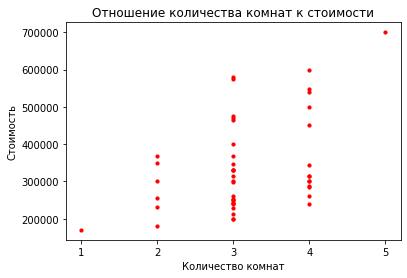

In [3]:
plt.scatter(number_of_rooms, cost, s=10, color='r')

plt.title('Отношение количества комнат к стоимости')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')

plt.xticks([i for i in range(1, 6)])
plt.show()

2. Линейная модель, которая учитывала бы только размер жилья

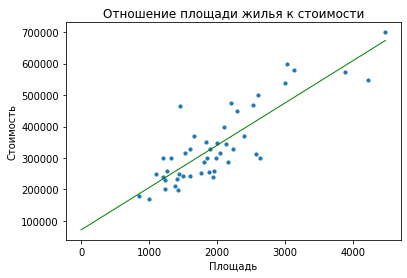

Ошибка модели: 1.9346e+11


In [4]:
f1p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 1, full=True)
f1 = np.poly1d(f1p)

fx = np.linspace(0, max(square_house)) 


plt.scatter(square_house, cost, s=10)

plt.plot(fx, f1(fx), linewidth=1.0, color='g')

plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

print(f"Ошибка модели: {error(f1, square_house, cost):.5}")

3. Полиномиальная модель (степени 2 и 3), учитывающая только размер жилья.

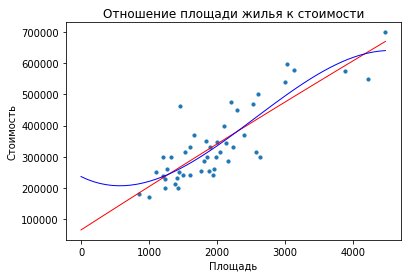

Ошибка модели степени 2: 1.9342e+11
Ошибка модели степени 3: 1.8844e+11


In [5]:
f2p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 2, full=True)
f2 = np.poly1d(f2p)

f3p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 3, full=True)
f3 = np.poly1d(f3p)

plt.scatter(square_house, cost, s=10)

plt.plot(fx, f2(fx), linewidth=1.0, color='r')
plt.plot(fx, f3(fx), linewidth=1.0, color='b')

plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

print(f"Ошибка модели степени 2: {error(f2, square_house, cost):.5}")
print(f"Ошибка модели степени 3: {error(f3, square_house, cost):.5}")

4. Линейная модель (с помощью scikit-learn), которая учитывала бы размер жилья и количество комнат

In [6]:
X = pd.DataFrame(list(zip(square_house, number_of_rooms)), columns = ['square', 'rooms'])
Y = cost

lin_reg = LinearRegression()

lin_reg.fit(X.values, Y)

print(f"Ошибка данной модели: {error(lin_reg.predict, X.values, Y):.5}")

Ошибка данной модели: 1.9207e+11


5. Предскажите значения для двух объектов недвижимости с использованием этих трех моделей: 1650,3; 2200,4

In [7]:
test = pd.DataFrame(list(zip([1650, 2200], [3, 4])))

pred1 = f1(test.values)
print(f"Линейная модель с учётом только размера: {pred1[0][0]:.2f}, {pred1[1][0]:.2f}")

pred2 = f2(test.values)
print(f"Модель 2 степени: {pred2[0][0]:.2f}, {pred2[1][0]:.2f}")

pred3 = f3(test.values)
print(f"Модель 3 степени: {pred3[0][0]:.2f}, {pred3[1][0]:.2f}")

pred4 = lin_reg.predict(test.values)
print(f"Множественная регрессия: {pred4[0]:.2f}, {pred4[1]:.2f}")

Линейная модель с учётом только размера: 293237.22, 367226.13
Модель 2 степени: 293387.08, 368112.59
Модель 3 степени: 285422.83, 365824.75
Множественная регрессия: 293081.46, 360909.32


Ошибка вышла наименьшей у модели третьей степени. Обучение модели более высокой степени показало более точный результат.